# Build Golf|Weather Dataset

Note: you can install the requirements file for this notebook if you want to install all the libraries at once. Open a new terminal window, navigate to the folder with the "requirements_jupyter.txt" and run the following command:

pip3 install -r requirements_jupyter.txt

In [1]:
# !pip3 install -r requirements_jupyter.txt

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [3]:
# Golf|Weather Data Set from https://gerardnico.com/data_mining/weather
golf_data_header = ['Outlook', 'Temperature_Numeric', 'Temperature_Nominal', 'Humidity_Numeric', 'Humidity_Nominal', 'Windy', 'Play']

golf_data_set = [['overcast',83,'hot',86,'high',False,True],
['overcast',64,'cool',65,'normal',True,True],
['overcast',72,'mild',90,'high',True,True],
['overcast',81,'hot',75,'normal',False,True],
['rainy',70,'mild',96,'high',False,True],
['rainy',68,'cool',80,'normal',False,True],
['rainy',65,'cool',70,'normal',True,False],
['rainy',75,'mild',80,'normal',False,True],
['rainy',71,'mild',91,'high',True,False],
['sunny',85,'hot',85,'high',False,False],
['sunny',80,'hot',90,'high',True,False],
['sunny',72,'mild',95,'high',False,False],
['sunny',69,'cool',70,'normal',False,True],
['sunny',75,'mild',70,'normal',True,True]]

# cast list of list to Pandas DataFrame
golf_df = pd.DataFrame(golf_data_set, columns=golf_data_header)
# convert  bool to ints
golf_df[['Windy','Play']] = golf_df[['Windy','Play']].astype(int)
 

## Explore Data

In [4]:
golf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
Outlook                14 non-null object
Temperature_Numeric    14 non-null int64
Temperature_Nominal    14 non-null object
Humidity_Numeric       14 non-null int64
Humidity_Nominal       14 non-null object
Windy                  14 non-null int64
Play                   14 non-null int64
dtypes: int64(4), object(3)
memory usage: 864.0+ bytes


In [5]:
golf_df.describe()

,Temperature_Numeric,Humidity_Numeric,Windy,Play
count,14.000000,14.000000,14.000000,14.000000
mean,73.571429,81.642857,0.428571,0.642857
std,6.571667,10.285218,0.513553,0.497245
min,64.000000,65.000000,0.000000,0.000000
25%,69.250000,71.250000,0.000000,0.000000
50%,72.000000,82.500000,0.000000,1.000000
75%,78.750000,90.000000,1.000000,1.000000
max,85.000000,96.000000,1.000000,1.000000


## Binarize/Dummify Categorical Data

In [6]:
def prepare_data_for_model(raw_dataframe, target_columns, drop_first = False, make_na_col = False):
    # dummy all categorical fields 
    dataframe_dummy = pd.get_dummies(raw_dataframe, columns=target_columns, 
                                     drop_first=drop_first, 
                                     dummy_na=make_na_col)
    return (dataframe_dummy)

# create dummy features 
golf_df_ready = prepare_data_for_model(golf_df, target_columns=['Outlook', 'Temperature_Nominal', 'Humidity_Nominal'])
golf_df_ready = golf_df_ready.dropna() 
golf_df_ready.head()

,Temperature_Numeric,Humidity_Numeric,Windy,Play,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_Nominal_cool,Temperature_Nominal_hot,Temperature_Nominal_mild,Humidity_Nominal_high,Humidity_Nominal_normal
0,83,86,0,1,1,0,0,0,1,0,1,0
1,64,65,1,1,1,0,0,1,0,0,0,1
2,72,90,1,1,1,0,0,0,0,1,1,0
3,81,75,0,1,1,0,0,0,1,0,0,1
4,70,96,0,1,0,1,0,0,0,1,1,0


# Modeling With Naive Bayes Classifiction

In [7]:
features = [feat for feat in list(golf_df_ready) if feat != 'Play']

naive_bayes = GaussianNB()
naive_bayes.fit(golf_df_ready[features], np.ravel(golf_df_ready[['Play']]))

# split data into train and test portions and model
X_train, X_test, y_train, y_test = train_test_split(golf_df_ready[features], 
                                                 golf_df_ready[['Play']], 
                                                 test_size=0.5, 
                                                 random_state=42)
print(X_train.head(3))
print ('Accuracy: %f' % naive_bayes.score(X_test,y_test))

    Temperature_Numeric  Humidity_Numeric  Windy  Outlook_overcast  \
1                    64                65      1                 1   
13                   75                70      1                 0   
4                    70                96      0                 0   

    Outlook_rainy  Outlook_sunny  Temperature_Nominal_cool  \
1               0              0                         1   
13              0              1                         0   
4               1              0                         0   

    Temperature_Nominal_hot  Temperature_Nominal_mild  Humidity_Nominal_high  \
1                         0                         0                      0   
13                        0                         1                      0   
4                         0                         1                      1   

    Humidity_Nominal_normal  
1                         1  
13                        1  
4                         0  
Accuracy: 0.714286


In [8]:
# Predictions
print(naive_bayes.predict(X_test))

[0 0 1 0 0 0 1]


In [9]:
# Probabilites 
print(naive_bayes.predict_proba(X_test))

[[9.99994910e-01 5.09005696e-06]
 [9.99968916e-01 3.10842486e-05]
 [0.00000000e+00 1.00000000e+00]
 [8.84570501e-01 1.15429499e-01]
 [8.00907988e-01 1.99092012e-01]
 [9.99932094e-01 6.79055800e-05]
 [0.00000000e+00 1.00000000e+00]]


In [10]:
# how about predicting on new data?
future_golf_data = pd.DataFrame([[85,40,0,0,0,1,0,0,1,0,1]], columns=features)
future_golf_data.head()


,Temperature_Numeric,Humidity_Numeric,Windy,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_Nominal_cool,Temperature_Nominal_hot,Temperature_Nominal_mild,Humidity_Nominal_high,Humidity_Nominal_normal
0,85,40,0,0,0,1,0,0,1,0,1


In [11]:
print("Will I Golf Tomorrow? %s" % bool(naive_bayes.predict(future_golf_data.head(1))[0]))

Will I Golf Tomorrow? True


# Pulling In Live Weather Data From OpenWeatherMap

In [13]:
# bring in real weather data using openweathermap and json.load
from urllib.request import urlopen
import json
YOUR_OPENWEATHERMAP_API_KEY = '<<ADD-API-HERE>>'
weather_json = json.load(urlopen("http://api.openweathermap.org/data/2.5/weather?q=Barcelona&appid=" + YOUR_OPENWEATHERMAP_API_KEY))
weather_json


{'coord': {'lon': 2.18, 'lat': 41.38},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 298.15,
  'pressure': 1018,
  'humidity': 73,
  'temp_min': 298.15,
  'temp_max': 298.15},
 'visibility': 10000,
 'wind': {'speed': 3.1, 'deg': 150},
 'clouds': {'all': 40},
 'dt': 1530815400,
 'sys': {'type': 1,
  'id': 5470,
  'message': 0.0034,
  'country': 'ES',
  'sunrise': 1530764651,
  'sunset': 1530818852},
 'id': 3128760,
 'name': 'Barcelona',
 'cod': 200}

In [14]:
# access individual sections
weather_json['main']

{'temp': 298.15,
 'pressure': 1018,
 'humidity': 73,
 'temp_min': 298.15,
 'temp_max': 298.15}

## Extracting Forecast Data

In [15]:
selected_location = "Seattle"
openweathermap_url = "http://api.openweathermap.org/data/2.5/forecast?q=" + selected_location + "&APPID=" + YOUR_OPENWEATHERMAP_API_KEY
from urllib.request import urlopen
import json
weather_json = json.load(urlopen(openweathermap_url))


# finding the right times - locate first 6AM instance
time_stamp_start = 0
len(weather_json['list'])
for forc in range(len(weather_json['list'])):
    time_stamp = weather_json['list'][forc]['dt_txt']
    if time_stamp.split()[1] == "06:00:00":
        time_stamp_start = forc  
        break;


In [16]:
# 6 AM next day
weather_json['list'][time_stamp_start]

{'dt': 1530856800,
 'main': {'temp': 292.26,
  'temp_min': 292.117,
  'temp_max': 292.26,
  'pressure': 1021.91,
  'sea_level': 1032.58,
  'grnd_level': 1021.91,
  'humidity': 56,
  'temp_kf': 0.14},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'clouds': {'all': 0},
 'wind': {'speed': 2.86, 'deg': 210},
 'sys': {'pod': 'n'},
 'dt_txt': '2018-07-06 06:00:00'}

In [17]:
# 12 PM next day
weather_json['list'][time_stamp_start+2]

{'dt': 1530878400,
 'main': {'temp': 288.817,
  'temp_min': 288.817,
  'temp_max': 288.817,
  'pressure': 1022.36,
  'sea_level': 1032.98,
  'grnd_level': 1022.36,
  'humidity': 69,
  'temp_kf': 0},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'clouds': {'all': 32},
 'wind': {'speed': 1.71, 'deg': 176.506},
 'sys': {'pod': 'n'},
 'dt_txt': '2018-07-06 12:00:00'}

## Translating Data From OpenWeatherMap to Golf|Weather Data

In [18]:
# get specifics for 12 PM
forecast_data = weather_json['list'][time_stamp_start+2]
forecast_data['main']['humidity']

69

In [19]:
forecast_data['weather'][0]['icon']

'03n'

In [20]:
forecast_data['wind']['speed']

1.71

In [21]:
golf_df[['Temperature_Numeric', 'Temperature_Nominal']].groupby('Temperature_Nominal').agg({'Temperature_Numeric' : [np.min, np.max]})

Temperature_Numeric     
                                   amin amax
Temperature_Nominal                         
cool                                 64   69
hot                                  80   85
mild                                 70   75

In [22]:
golf_df[['Humidity_Numeric', 'Humidity_Nominal']].groupby('Humidity_Nominal').agg({'Humidity_Numeric' : [np.min, np.max]})

Humidity_Numeric     
                             amin amax
Humidity_Nominal                      
high                           85   96
normal                         65   80

### Humidity

In [23]:
# humidity
def GetNominalHumidity(humidity_percent):
     if (humidity_percent > 80):
        return "high"
     else:
        return "normal"
    
humidity = forecast_data['main']['humidity']
print('humidity: %f' % humidity)
humidity_nominal = GetNominalHumidity(humidity)
print('humidity_nominal: %s' % humidity_nominal.capitalize())

humidity: 69.000000
humidity_nominal: Normal


### Temperature

In [24]:
# temperature
def GetNominalTemparature(temp_fahrenheit):
    if (temp_fahrenheit < 70):
        return "cool"
    elif (temp_fahrenheit < 80):
        return "mild"
    else:
        return "hot"
    
# temperature - to Fahrenheit and to nominal 
temperature = float(forecast_data['main']['temp']) * 1.8 - 459.67
print('temperature: %f Fahrenheit' % temperature)
temperature_nominal = GetNominalTemparature(temperature)
print('temperature_nominal: %s' % temperature_nominal.capitalize())

temperature: 60.200600 Fahrenheit
temperature_nominal: Cool


### Is Windy

In [25]:
def GetWindyBoolean(wind_meter_second):
    if (wind_meter_second > 10.8):
        return(True)
    else:
        return(False)
    
# wind speed 
iswindy = GetWindyBoolean(forecast_data['wind']['speed'])
print('iswindy: %s' % iswindy)

iswindy: False


### Outlook and icon

In [26]:
def GetWeatherOutlookAndWeatherIcon(main_weather_icon):
    # truncate third char - day or night not needed
    main_weather_icon = main_weather_icon[0:2]

    # return "Golf|Weather Data" variable and daytime icon
    if (main_weather_icon in ["01", "02"]):
        return("sunny", main_weather_icon + "d.png")
    elif (main_weather_icon in ["03", "04", 50]):
        return("overcast", main_weather_icon + "d.png")
    else:
        return("rain", main_weather_icon + "d.png")
    
# weather icon
outlook, outlook_icon = GetWeatherOutlookAndWeatherIcon(forecast_data['weather'][0]['icon'])
print('Outlook: %s' % outlook.capitalize())
 
            

Outlook: Overcast


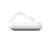

In [27]:
from IPython.core.display import Image, display
display(Image("http://openweathermap.org/img/w/" + outlook_icon, unconfined=True))

## Feeding in openweathermap data into the model

In [28]:
list(X_test)

['Temperature_Numeric',
 'Humidity_Numeric',
 'Windy',
 'Outlook_overcast',
 'Outlook_rainy',
 'Outlook_sunny',
 'Temperature_Nominal_cool',
 'Temperature_Nominal_hot',
 'Temperature_Nominal_mild',
 'Humidity_Nominal_high',
 'Humidity_Nominal_normal']

In [29]:
# get openweathermap data
selected_location = "portland"
openweathermap_url = "http://api.openweathermap.org/data/2.5/forecast?q=" + selected_location + "&APPID=" + YOUR_OPENWEATHERMAP_API_KEY
from urllib.request import urlopen
import json
weather_json = json.load(urlopen(openweathermap_url))


# find the right times - locate first 6AM instance
time_stamp_start = 0
len(weather_json['list'])
for forc in range(len(weather_json['list'])):
    time_stamp = weather_json['list'][forc]['dt_txt']
    if time_stamp.split()[1] == "06:00:00":
        time_stamp_start = forc  
        break;

#  6-9 AM = time_stamp_start
#  9-12 PM = time_stamp_start + 1
#  12-3 PM = time_stamp_start + 2
#  3-6 PM = time_stamp_start + 3
#  6-9 PM = time_stamp_start + 4
#  9-12 AM = time_stamp_start + 5
        
# get specifics for 12 PM
forecast_data = weather_json['list'][time_stamp_start+2]

# temperature - to Fahrenheit and to nominal 
temperature = float(forecast_data['main']['temp']) * 1.8 - 459.67
temperature_nominal = GetNominalTemparature(temperature)
humidity = forecast_data['main']['humidity']
humidity_nominal = GetNominalHumidity(humidity)
iswindy = GetWindyBoolean(forecast_data['wind']['speed'])
outlook, outlook_icon = GetWeatherOutlookAndWeatherIcon(forecast_data['weather'][0]['icon'])
 
Temperature_Numeric = temperature
Humidity_Numeric = humidity
Windy = int(iswindy)
Outlook_overcast = int(outlook=="overcast")
Outlook_rainy = int(outlook=="rainy")
Outlook_sunny = int(outlook=="sunny")

Temperature_Nominal_cool = int(temperature_nominal=="cool")
Temperature_Nominal_hot = int(temperature_nominal=="hot")
Temperature_Nominal_mild = int(temperature_nominal=="mild")
Humidity_Nominal_high = int(humidity_nominal=="high")
Humidity_Nominal_normal = int(humidity_nominal=="normal")

 
future_data = pd.DataFrame([[Temperature_Numeric,
 Humidity_Numeric,
 Windy,
 Outlook_overcast,
 Outlook_rainy,
 Outlook_sunny,
 Temperature_Nominal_cool,
 Temperature_Nominal_hot,
 Temperature_Nominal_mild,
 Humidity_Nominal_high,
 Humidity_Nominal_normal]], columns = list(X_test) )

future_data

,Temperature_Numeric,Humidity_Numeric,Windy,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_Nominal_cool,Temperature_Nominal_hot,Temperature_Nominal_mild,Humidity_Nominal_high,Humidity_Nominal_normal
0,56.4206,79,0,0,0,1,1,0,0,0,1


In [30]:

print(naive_bayes.predict_proba(future_data))
print(naive_bayes.predict(future_data))

[[0.97833465 0.02166535]]
[0]


In [31]:
prediction = naive_bayes.predict_proba(future_data)
print("There is a %f percent chance of golfing tomorrow." % (prediction[0][1] * 100))

There is a 2.166535 percent chance of golfing tomorrow.


In [32]:
# Making text Internet/URL friendly
import urllib.parse
urllib.parse.quote_plus('New York City!!')

'New+York+City%21%21'